In [33]:
## Load h2o and do some predictions!

In [34]:
import pandas as pd
import numpy as np
import rasterio
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_45"; Java(TM) SE Runtime Environment (build 1.8.0_45-b14); Java HotSpot(TM) 64-Bit Server VM (build 25.45-b02, mixed mode)
  Starting server from /storage/anaconda3/envs/forest_mapping/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpte8h1fe6
  JVM stdout: /tmp/tmpte8h1fe6/h2o_ubuntu_started_from_python.out
  JVM stderr: /tmp/tmpte8h1fe6/h2o_ubuntu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,"14 days, 13 hours and 10 minutes"
H2O cluster name:,H2O_from_python_ubuntu_buxnxj
H2O cluster total nodes:,1
H2O cluster free memory:,13.98 Gb
H2O cluster total cores:,32
H2O cluster allowed cores:,32
H2O cluster status:,"accepting new members, healthy"


In [36]:
ACQ_NAME = 'portland-metro_2014'
DATA_FILE = '../data/processed/{}_features.csv'.format(ACQ_NAME)
hf = h2o.import_file(DATA_FILE)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [37]:
hf.describe()

Rows:5406666
Cols:74




,C1,mat,mwmt,mcmt,td,map,msp,ahm,shm,dd_0,dd5,dd_18,dd18,nffd,bffp,effp,ffp,pas,emt,ext,eref,cmd,rh,distance_to_water_m,strat0_return-proportion,strat1_return-proportion,strat2_return-proportion,strat3_return-proportion,strat4_return-proportion,strat5_return-proportion,strat0_intensity-median,strat1_intensity-median,strat2_intensity-median,strat3_intensity-median,strat4_intensity-median,strat5_intensity-median,height_05-percentile,height_25-percentile,height_50-percentile,height_75-percentile,height_95_percentile,height_max,cover,potential_volume,stddev_height,surface_area_ratio,surface_volume,surface_volume_ratio,aspect,elevation,overall_curvature,plan_curvature,profile_curvature,slope,solar_radiation_index,bulk_dens,soil_depth,pct_clay_surf,pct_rock_surf,pct_sand_surf,blue,green,red,nir,swir1,swir2,brightness,greenness,wetness,ndvi,savi,endvi,pot_veg_type,year_diff
type,int,real,real,real,real,int,int,real,real,int,int,int,int,int,int,int,int,int,real,real,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,int,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,int,int
mins,258179.0,1.3,11.7,-14.6,15.7,1.0,1.0,4.8,24.8,5.0,643.0,526.0,3.0,49.0,23.0,224.0,40.0,0.0,-49.0,15.1,584.0,163.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.98915,-0.93745,-0.811825,0.0066,1.3,1.3587251,10.0,0.0,0.0,1.0,0.0,5.6e-05,0.17985,1.025175,-34.44785,-27.3895,-23.837975,0.0047,0.56865,84.0,1.0,9.0,1.0,8.0,-827.0,-143.33333,-261.0,-12.5,-34.0,-13.5,21.378649,-726.2262,-1294.2433,-1.1170961,-1.671729,-0.4201224,1.0,5.0
mean,30561252.275844313,14.84690217594354,28.796883587778503,1.753167534299327,27.043683612044823,102.35675220181906,62.64331734196269,1956.2183036274112,3077.088447002274,150.7515737054961,3988.9560954939725,2212.137329548377,1077.2593324610762,210.97296614956426,114.58900142897669,286.4426955539702,171.8543050375223,7.648307478213006,-33.88248539858018,47.67781496027316,1648.5462504989205,1563.1935582852716,33.26547117946622,531.9827976456597,0.2699174105420877,0.09379022227874131,0.1196091377909754,0.18730034136775275,0.13196531744540224,0.07414949506374795,44.00169177888678,45.712693742016704,35.335086932218125,31.74483340899056,35.44843717569371,40.18985575396967,1.225821652870052,6.527934179367909,10.338525246474319,13.895686169844161,18.05680471566251,21.50123864893653,63.629235076267655,2079.0384027579616,4.2256335626433446,3.030055756400548,1207.9484640894955,9.916113176358902e+32,184.24338325597088,225.53114579258747,-0.0015099914270275455,-0.006054948651052529,0.00696593042349223,9.152297844569716,1.6846375133360836,119.19389028284705,148.61845229574004,23.604133859942532,8.463835014036377,17.974102154636522,339.99154498480294,543.7739367911643,471.16809874096447,2889.530203600292,1475.4913662066417,778.3674305288393,298.91079295365296,162.93678097901213,-47.288391808478494,0.7160775313236383,1.0739481280755208,0.6793997642847922,634.6872906519474,5.0
maxs,42403038.0,24.0,36.4,13.4,41.3,4243.0,555.0,32506.5,35782.1,1220.0,6896.0,6061.0,2676.0,363.0,196.0,356.0,333.0,894.0,-10.8,82.2,2114.0,2082.0,66.0,5295.319,0.899925,0.8988,1.0,1.0,1.0,1.0,2906.0,3512.0,371.16666,568.0,637.0,1030.75,106.4405,107.4618,107.7732,108.83403,109.722725,110.0,100.0,10992.36,44.410072,42.51974,9174.665,3.4028235e+38,359.72095,1449.4402,34.759075,17.564949,27.5655,73.47975,1.999575,200.0,182.0,41.0,95.0,52.0,11175.333,11613.333,11914.333,8655.333,13492.167,13967.167,2209.8582,463.32697,166.42163,1.2856101,1.9278877,6.022864,1256.0,5.0
sigma,4989885.421590791,3.257741675443142,3.5821627752808793,4.266832791205111,3.239358552570988,162.26806676771773,59.719541833177324,5328.593413818984,7247.99151494678,160.7540074852326,895.5580708230541,771.9158528391287,434.74710091773454,49.03454534855277,24.825083271657984,18.375120235820024,42.08945593843336,34.573834102397726,4.999345469490685,3.3628

In [38]:
LIDAR_COLS = ['strat0_return-proportion', 'strat1_return-proportion', 
              'strat2_return-proportion', 'strat3_return-proportion', 'strat4_return-proportion', 
              'strat5_return-proportion', 'strat0_intensity-median', 'strat1_intensity-median', 
              'strat2_intensity-median', 'strat3_intensity-median', 'strat4_intensity-median', 
              'strat5_intensity-median', 'height_05-percentile', 'height_25-percentile', 
              'height_50-percentile', 'height_75-percentile', 'height_95_percentile', 
              'height_max', 'cover', 'potential_volume', 'stddev_height', 'surface_area_ratio', 
              'surface_volume', 'surface_volume_ratio', 'aspect', 'elevation', 'overall_curvature', 
              'plan_curvature', 'profile_curvature', 'slope', 'solar_radiation_index']
LANDSAT_COLS = ['green', 'blue', 'red', 'nir', 'endvi', 'ndvi', 'savi', 'swir1',
                'swir2', 'wetness', 'greenness', 'brightness']
CLIMATE_COLS = ['mat','mwmt','mcmt','td','map','msp',
                'ahm','shm','dd_0','dd5','dd_18','dd18',
                'nffd','bffp','effp','ffp','pas','emt',
                'ext','eref','cmd','rh']
SOIL_COLS = ['bulk_dens', 'soil_depth', 'pct_clay_surf', 'pct_rock_surf', 'pct_sand_surf']

In [39]:
hf['eref'] = hf['eref'].asnumeric()
hf['pot_veg_type'] = hf['pot_veg_type'].asfactor()
hf[LIDAR_COLS] = hf[LIDAR_COLS].asnumeric()

In [40]:
FOREST_TYPE_MODEL = '../models/gbm_forest_type_rebalance/gbm_type_rebalance'
gbm_forest_type_model = h2o.load_model(FOREST_TYPE_MODEL)

SIZE_CLASS_MODEL = '../models/gbm_size_class/gbm_size_class'
gbm_size_class_model = h2o.load_model(SIZE_CLASS_MODEL)

COVER_MODEL = '../models/gbm_cov_class/gbm_cov_class'
gbm_cover_model = h2o.load_model(COVER_MODEL)

In [41]:
type_res = gbm_forest_type_model.predict(hf)

gbm prediction progress: |████████████████████████████████████████████████| 100%


/storage/anaconda3/envs/forest_mapping/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'pot_veg_type' has levels not trained on: [1, 3, 4, 5, 6, 7, 8, 9, 10, 18, 19, 20, 21, 23, 24, 25, 32, 52, 56, 57, 59, 72, 76, 77, 79, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 122, 142, 146, 147, 182, 184, 185, 186, 187, 189, 243, 244, 245, 247, 248, 250, 251, 252, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 335, 336, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 388, 403, 405, 406, 407, 408, 409, 412, 413, 433, 447, 456, 460, 461, 463, 506, 507, 510, 511, 513, 514, 515, 516, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 548, 549, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 572, 573, 574, 575, 576, 577, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 591, 592, 593, 594, 595, 604, 605, 606, 607, 608, 609, 610, 611, 634, 63

In [42]:
size_res = gbm_size_class_model.predict(hf)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [43]:
cover_res = gbm_cover_model.predict(hf)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [44]:
type_preds = type_res['predict'].as_data_frame()
size_preds = size_res['predict'].as_data_frame()
cover_preds = cover_res['predict'].as_data_frame()

In [45]:
size_classes = {'Nonstocked':1, 'Seedling-Sapling':2, 'Small':3, 'Medium':4, 'Large':5, 'Very Large':6}
size_lookup = pd.DataFrame(size_classes.values(), index=size_classes.keys(), columns=['id'])
size_lookup.head()

,id
Nonstocked,1
Seedling-Sapling,2
Small,3
Medium,4
Large,5


In [46]:
cover_classes = {'Sparse':1, 'Open':2, 'Moderate':3, 'Closed':4}
cover_lookup = pd.DataFrame(cover_classes.values(), index=cover_classes.keys(), columns=['id'])
cover_lookup.head()

,id
Sparse,1
Open,2
Moderate,3
Closed,4


In [47]:
forest_type_lookup = pd.read_csv('../data/processed/sppgrp_forest_type_crosswalk.csv', 
                                 names=['id', 'name'], 
                                 header=0, 
                                 index_col='name')
forest_type_lookup['id'] = forest_type_lookup['id'] + 1
forest_type_lookup.head()          

,id
name,
COTTONWOOD-AND-ASPEN,1
COTTONWOOD-AND-ASPEN_LODGEPOLE-PINE,2
DOUGLAS-FIR,3
DOUGLAS-FIR_ENGELMANN-AND-OTHER-SPRUCES,4
DOUGLAS-FIR_INCENSE-CEDAR,5


In [48]:
LIDARMETS = '../data/processed/rasters_for_modeling/{}_lidar_rescaled.tif'.format(ACQ_NAME)
with rasterio.open(LIDARMETS) as lidar_src:
    raster_meta = lidar_src.meta.copy()
    ht95 = lidar_src.read(17 , masked=True)  # 'height_95_percentile', 
    cover = lidar_src.read(19 , masked=True)  # 'cover'

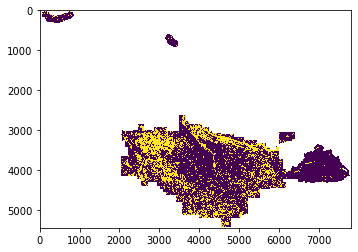

In [49]:
non_forest = (ht95 < 1.3) * (cover < 10)
plt.imshow(non_forest)

In [50]:
non_forest = np.ma.masked_where(~non_forest, non_forest)

In [51]:
good_data = hf['C1'].as_data_frame()
good_data = good_data.set_index('C1')

In [52]:
data = pd.DataFrame(np.zeros(lidar_src.shape).flatten()).drop(0, axis=1)

In [53]:
data.head()

""
0
1
2
3
4


In [54]:
good_data.loc[:, 'forest_type_prediction'] = type_preds.values
good_data.loc[:, 'size_class_prediction'] = size_preds.values
good_data.loc[:, 'cover_class_prediction'] = cover_preds.values

In [55]:
good_data['forest_type_id'] = forest_type_lookup.loc[good_data['forest_type_prediction']].values
good_data['size_class_id'] = size_lookup.loc[good_data['size_class_prediction']].values
good_data['cover_class_id'] = cover_lookup.loc[good_data['cover_class_prediction']].values

In [56]:
good_data[['forest_type_prediction', 'forest_type_id', 
           'size_class_prediction', 'size_class_id',
           'cover_class_prediction', 'cover_class_id'
          ]].head()

,forest_type_prediction,forest_type_id,size_class_prediction,size_class_id,cover_class_prediction,cover_class_id
C1,,,,,,
258179,DOUGLAS-FIR,3,Small,3,Open,2
258180,DOUGLAS-FIR,3,Small,3,Open,2
258181,DOUGLAS-FIR,3,Medium,4,Open,2
258182,DOUGLAS-FIR,3,Small,3,Open,2
258183,DOUGLAS-FIR,3,Medium,4,Open,2


In [57]:
data['forest_type_id'] = good_data['forest_type_id']
data['forest_type_id'] = data['forest_type_id'].fillna(0).astype(int)

data['size_class_id'] = good_data['size_class_id']
data['size_class_id'] = data['size_class_id'].fillna(0).astype(int)

data['cover_class_id'] = good_data['cover_class_id']
data['cover_class_id'] = data['cover_class_id'].fillna(0).astype(int)

In [58]:
non_forest.mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

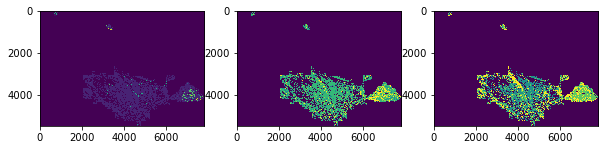

In [59]:
type_reshaped = data['forest_type_id'].values.reshape(lidar_src.shape)
size_reshaped = data['size_class_id'].values.reshape(lidar_src.shape)
cover_reshaped = data['cover_class_id'].values.reshape(lidar_src.shape)

type_reshaped[~non_forest.mask] = 0
size_reshaped[~non_forest.mask] = 0
cover_reshaped[~non_forest.mask] = 0


fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(type_reshaped)
axs[1].imshow(size_reshaped)
axs[2].imshow(cover_reshaped)

plt.show()

In [60]:
raster_meta.update(dtype = 'uint8',
                nodata=0,
                count = 3)
raster_meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0,
 'width': 7801,
 'height': 5451,
 'count': 3,
 'crs': CRS.from_epsg(6339),
 'transform': Affine(20.0, 0.0, 438995.0,
        0.0, -20.0, 5114005.0)}

In [61]:
with rasterio.open('../data/processed/predictions/{}_forest_type_predictions.tif'.format(ACQ_NAME), 
                   'w', **raster_meta) as dst:
    dst.write(type_reshaped.astype(rasterio.uint8), 1)
    dst.set_band_description(1, 'forest_type')
    
    dst.write(size_reshaped.astype(rasterio.uint8), 2)
    dst.set_band_description(2, 'size_class')
    
    dst.write(cover_reshaped.astype(rasterio.uint8), 3)
    dst.set_band_description(3, 'cover_class')

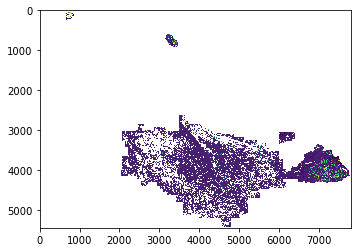

In [62]:
with rasterio.open('../data/processed/predictions/{}_forest_type_predictions.tif'.format(ACQ_NAME), 
                   'r') as src:
    img = src.read(1, masked=True)
plt.imshow(img)

In [63]:
# h2o.cluster().shutdown()